In this notebook, we will cover some of the methods for displaying and visualizing data available in Python, using the matplotlib and seaborn packages.

This first plot is about as simple as one can get - generate some (x,y) data and plot it
using a default solid line.

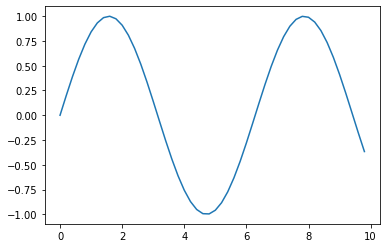

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 

# Generate some data 
x = np.arange(0, 10, 0.2) 
y = np.sin(x) 

# Generate the plot 
plt.plot(x, y) 

# Display it on the screen 
plt.show()

The next level of sophistication, which is incredibly useful, is to create multiple plots and
visualize them on the same canvas.

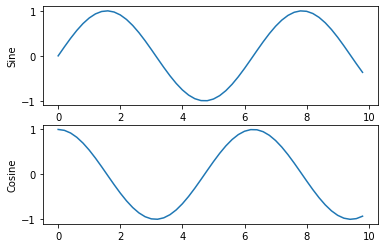

In [2]:
z = np.cos(x)

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=2, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs[0].plot(x,y) 
axs[0].set_ylabel('Sine') 

# On the second axis, plot the cosine 
axs[1].plot(x,z) 
axs[1].set_ylabel('Cosine')

plt.show()

Now, we will look at some of the methods of visualizing statistical data (from an experiment
where a large number of data points are taken.

We have already seen pandas and seaborn, the visualization packages.  We will add to that
the stats package from scipy that will provide a lot of interesting and useful statistical tools.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


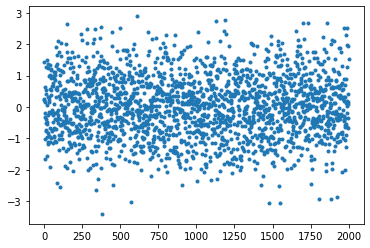

In [3]:
import pandas as pd 
import scipy.stats as stats 
import seaborn as sns


# Generate the data ... again will use the randn() method from numpy.random
# This will generate 2000 data points (samples) from a Gaussian distribution
# with a mean value of zero and a standard deviation of 1.
x = np.random.randn(2000) 

# Plot-command start --------------------- 
plt.plot(x, '.') 
# Plot-command end ----------------------- 

# Show plot 
plt.show()


A more useful way of visualizing this data is by plotting a histogram
We need to specify the number of bins to use ... matplotlib does the rest!



(array([  1.,   3.,   3.,   1.,   8.,   5.,  21.,  34.,  44.,  64.,  83.,
        110., 117., 144., 169., 150., 174., 166., 155., 120., 109.,  92.,
         65.,  58.,  35.,  31.,  14.,  11.,   9.,   4.]),
 array([-3.41174026, -3.20149238, -2.99124451, -2.78099663, -2.57074875,
        -2.36050087, -2.150253  , -1.94000512, -1.72975724, -1.51950936,
        -1.30926148, -1.09901361, -0.88876573, -0.67851785, -0.46826997,
        -0.2580221 , -0.04777422,  0.16247366,  0.37272154,  0.58296942,
         0.79321729,  1.00346517,  1.21371305,  1.42396093,  1.63420881,
         1.84445668,  2.05470456,  2.26495244,  2.47520032,  2.68544819,
         2.89569607]),
 <a list of 30 Patch objects>)

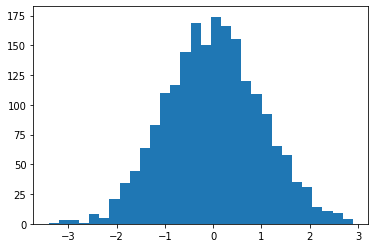

In [4]:
numbins = 30
plt.hist(x, bins=numbins)

One of the disadvantages of histograms is that the choice of number of bins
can change the look (and potentially the interpretation) of the displayed data.  

To get around this, we can use the kdeplot() method from seaborn.  kde, in this
instance, stands for Kernel Density Estimation.  The default "kernel" is a Gaussian
distribution, which is appropriate in this case, because we generated our data
from a Gaussian.  Basically, what kdeplot() does is this:

1. It "fits" a Gaussian distribution to the data to get estimates of the mean and
  standard deviation
2. It then uses this estimated Gaussian together with a sophisticated algorithm to
  effectively create a smooth curve that approximates the actual data distribution.




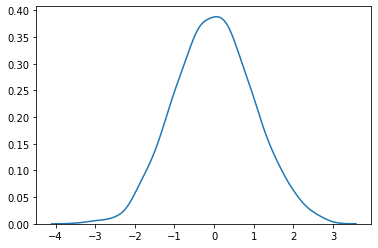

In [5]:
sns.kdeplot(x)

It may be useful, at times to look at the integral of the data distribution, moving from left
to right, bin by bin.  Clearly, at the left side of the distribution, the integrated counts are
zero, and by the time we get to the right side of the distribution, the integrated counts are
the number of datapoints generated.

Such an integration is known as a 'cumulative frequency" distribution.



CumfreqResult(cumcount=array([1.000e+00, 1.000e+00, 6.000e+00, 7.000e+00, 1.500e+01, 1.900e+01,
       3.100e+01, 6.900e+01, 1.120e+02, 1.740e+02, 2.510e+02, 3.670e+02,
       4.840e+02, 6.320e+02, 8.070e+02, 9.590e+02, 1.140e+03, 1.306e+03,
       1.468e+03, 1.590e+03, 1.707e+03, 1.793e+03, 1.851e+03, 1.908e+03,
       1.939e+03, 1.968e+03, 1.982e+03, 1.993e+03, 1.998e+03, 2.000e+03]), lowerlimit=-3.520489164874253, binsize=0.2174978046446392, extrapoints=0)


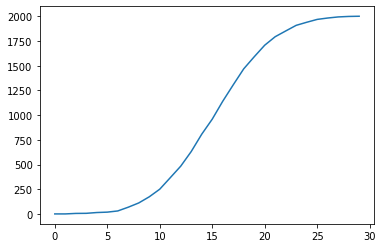

In [6]:
plt.plot(stats.cumfreq(x,numbins)[0])

print (stats.cumfreq(x,numbins))

One of the main concepts associated with this entire course is the notion that in experiments, it
in not possible to make measurements of any physical quantity with perfect precision.  This is known
as EXPERIMENTAL UNCERTAINTY.  At the same time, when one makes repeated measurements of the same quantity, 
one expects a distribution of results (i.e. not the exact same value every time). This is known as 
STATISTICAL UNCERTAINTY.  The two ideas are related to one another, and we will discuss them both in great
detail.  Visually, one of the ways that we can convey these uncertainties is to plot ERROR BARS for each
data point.  These error bars help us to visualize the range of possible values that one might expect
for the given quantity in an experiment.

In [19]:
# Let's read some data from a file that contains information on the size of the error bars, along with 
# the data values.

url =  'https://raw.githubusercontent.com/brash99/phys341/master/JupyterNotebooks/data_header.txt'
df = pd.read_csv(url)
df.head()

,Time,Distance,Error
0,1,1.3,0.6
1,2,2.1,0.7
2,3,4.8,0.8
3,4,3.3,0.9


<ErrorbarContainer object of 3 artists>

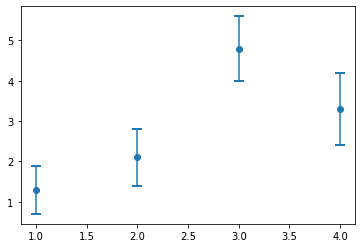

In [20]:
# matplotlib.pyplot allows us to plot the error bars along with the data points, in a customized way.

plt.errorbar(df.Time, df.Distance, yerr=df.Error, fmt='o', capsize=5, capthick=2)

In [21]:
df2 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

In [22]:
df2.describe()

,a,b,c,d
count,50.000000,50.000000,50.000000,50.000000
mean,0.484757,0.491599,0.525990,0.481631
std,0.285053,0.297743,0.284287,0.315823
min,0.031068,0.012843,0.012349,0.011877
25%,0.276406,0.248641,0.286490,0.157485
50%,0.463088,0.431929,0.517964,0.473108
75%,0.697584,0.802061,0.785666,0.727336
max,0.994639,0.948744,0.993585,0.989773


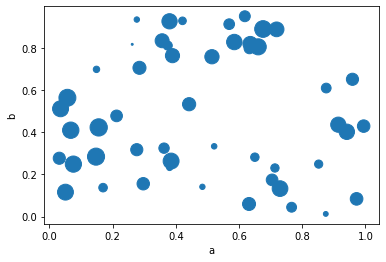

In [23]:
df2.plot(kind='scatter', x='a', y='b', s=df2['c']*300);

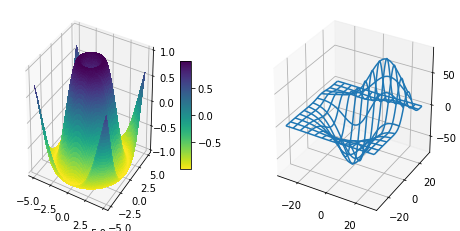

In [24]:
# imports specific to the plots in this example
from matplotlib import cm   # colormaps
      
# This module is required for 3D plots!
from mpl_toolkits.mplot3d import Axes3D
    
# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))
    
#---- First subplot
# Generate the data
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
    
# Note the definition of "projection", required for 3D  plots
#plt.style.use('ggplot')

ax = fig.add_subplot(1, 2, 1, projection='3d')
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.GnBu,
#            linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis_r,
            linewidth=0, antialiased=False)

# set the z-axis limits to make things look nice
ax.set_zlim3d(-1.01, 1.01)

# add a colorbar to indicate the z-axis value
fig.colorbar(surf, shrink=0.5, aspect=10)
    
#---- Second subplot
# Get some 3d test-data
from mpl_toolkits.mplot3d.axes3d import get_test_data
    
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)